In [2]:
import ROOT as rt
import root_numpy as rtnp
import csv
import re
import sys

import collections
from collections import OrderedDict
import uproot
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable
from tableFormats import latexTable
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
# CMS_lumi.writeExtraText = 1
# CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.16/00
3.6.6 (default, Mar 29 2019, 00:03:27) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-36)]


In [3]:
# label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'

lumi = (37.80+44.98+63.67) * 1000 #in pb, CMS recorded 2016 + 2017 + 2018

onelep_br = 0.2134
twolep_br = 0.06729
    
wh = { 'mh125':1.475,
    'mh300':0.06724,
    'mh500':0.008621,
    'mh1000':3.585E-4,
    'mh2000':5.706E-06 }
zh = {  'mh125':9.095E-01,
    'mh300':4.132E-02,
    'mh500':5.256E-03,
    'mh1000':2.977E-04,
    'mh2000':7.639E-06 }
cs = {
}
masses = [ 'mh125', 'mh300','mh500','mh1000','mh2000']
# pls = [ 'pl500','pl1000','pl10000']
pls = ['pl1000']
modes = ['onelep','twolep']
for m in masses:
    cs[m] = {}
    cs[m]['onelep'] = wh[m]*onelep_br
    cs[m]['twolep'] = zh[m]*twolep_br

n_mc = {}
for k,v in cs.items():
    n_mc[k] = {}
    for j,u in v.items():
        n_mc[k][j] = lumi*u
        print(k,j,n_mc[k][j])


mh125 onelep 46097.33425
mh125 twolep 8962.77734475
mh300 onelep 2101.4133932
mh300 twolep 407.19291906
mh500 onelep 269.42719903
mh500 twolep 51.795885348000006
mh1000 onelep 11.203996155
mh1000 twolep 2.9337205228500003
mh2000 onelep 0.17832636558
mh2000 twolep 0.0752794459995


In [8]:
fpath =OrderedDict()
tree = OrderedDict()
for mass in masses:
    fpath[mass] = {}
    tree[mass] = {}
bbbb = 0
# directory = '/nfshome/christiw/llp/jetNtuple_RunIISummer16/withISR/'
directory = '/mnt/hadoop/store/group/phys_llp/jet_timing_studies_ntuple/NormalizedNtuples/RunIISummer16_withISR/'
# if bbbb:
#     directory = directory + 'bbbb/'
    
#     fpath['mh1000']['pl10000'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh1000_mx475_pl10000_ev100000_1pb_weighted.root'
#     fpath['mh1000']['pl1000'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh1000_mx475_pl1000_ev100000_1pb_weighted.root'
#     fpath['mh1000']['pl500'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh1000_mx475_pl500_ev100000_1pb_weighted.root'
#     fpath['mh125']['pl10000'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh125_mx50_pl10000_ev100000_1pb_weighted.root'
#     fpath['mh125']['pl1000'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh125_mx50_pl1000_ev100000_1pb_weighted.root'
#     fpath['mh2000']['pl10000'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh2000_mx975_pl10000_ev100000_1pb_weighted.root'
#     fpath['mh2000']['pl1000'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh2000_mx975_pl1000_ev100000_1pb_weighted.root'
#     fpath['mh2000']['pl500'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh2000_mx975_pl500_ev100000_1pb_weighted.root'
#     fpath['mh300']['pl500'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh300_mx125_pl500_ev100000_1pb_weighted.root'
#     fpath['mh500']['pl500'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh500_mx225_pl500_ev100000_1pb_weighted.root'
#     fpath['mh500']['pl1000'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh500_mx225_pl1000_ev100000_1pb_weighted.root'
#     fpath['mh500']['pl10000'] = directory+'jet_timing_studies_ntuple_bbbb_vh_ISR_mh500_mx225_pl10000_ev100000_1pb_weighted.root'

# else:
#     directory = directory + 'met_bb/'

#     fpath['mh1000']['pl10000'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh1000_mx475_pl10000_ev100000_1pb_weighted.root'
#     fpath['mh1000']['pl1000'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh1000_mx475_pl1000_ev100000_1pb_weighted.root'
#     fpath['mh1000']['pl500'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh1000_mx475_pl500_ev100000_1pb_weighted.root'
#     fpath['mh125']['pl1000'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh125_mx50_pl1000_ev100000_1pb_weighted.root'
#     fpath['mh2000']['pl10000'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh2000_mx975_pl10000_ev100000_1pb_weighted.root'
#     fpath['mh2000']['pl1000'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh2000_mx975_pl1000_ev100000_1pb_weighted.root'
#     fpath['mh2000']['pl500'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh2000_mx975_pl500_ev100000_1pb_weighted.root'
#     fpath['mh500']['pl10000'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh500_mx225_pl10000_ev100000_1pb_weighted.root'
#     fpath['mh500']['pl500'] = directory+'jet_timing_studies_ntuple_vh_ISR_mh500_mx225_pl500_ev100000_1pb_weighted.root'

directory = '/mnt/hadoop/store/group/phys_exotica/delayedjets/llpntuple/V1p0/MC_Summer16/v1/christiw/signals_vh_pl1000/'
if bbbb:
    fpath['mh125']['pl1000'] = directory + 'llp_ntupler_bbbb_vh_ISR_mh125_mx50_pl1000_ev100000.root'
    fpath['mh300']['pl1000'] = directory + 'llp_ntupler_bbbb_vh_ISR_mh300_mx125_pl1000_ev100000.root'
    fpath['mh500']['pl1000'] = directory + 'llp_ntupler_bbbb_vh_ISR_mh500_mx225_pl1000_ev100000.root'
    fpath['mh1000']['pl1000'] = directory + 'llp_ntupler_bbbb_vh_ISR_mh1000_mx475_pl1000_ev100000.root'
    fpath['mh2000']['pl1000'] = directory + 'llp_ntupler_bbbb_vh_ISR_mh2000_mx975_pl1000_ev100000.root'

else:
    fpath['mh125']['pl1000'] = directory + 'llp_ntupler_metbb_vh_ISR_mh125_mx50_pl1000_ev100000.root'
    fpath['mh300']['pl1000'] = directory + 'llp_ntupler_metbb_vh_ISR_mh300_mx125_pl1000_ev100000.root'
    fpath['mh500']['pl1000'] = directory + 'llp_ntupler_metbb_vh_ISR_mh500_mx225_pl1000_ev100000.root'
    fpath['mh1000']['pl1000'] = directory + 'llp_ntupler_metbb_vh_ISR_mh1000_mx475_pl1000_ev100000.root'
    fpath['mh2000']['pl1000'] = directory + 'llp_ntupler_metbb_vh_ISR_mh2000_mx975_pl1000_ev100000.root'


for k,v in fpath.items():
    for j,u in v.items():
#         tree[k][j] = rtnp.root2array(u)
        root_dir = uproot.open(u) 
        tree[k][j] = root_dir['ntuples']['llp']
        a = tree[k][j]["jetPt"].array()
        print (a[:-1][0])
    
    
trigger_names_file = '/nfshome/christiw/llp/delayed_jet_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])

[132.34378   29.666996]
[101.98067  84.19344]
[107.67174   59.466644  32.696934  20.962255]
[177.03577  151.1412    45.019302  33.66182 ]
[255.66559  197.133    182.85309  116.32124   91.876305  45.172024]


In [16]:
trigger_paths = [87,135,177,362,310] #PFMET120
onelep_tp = [87,135]
twolep_tp = [87,135,177,362]
# 177 HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ
# 362 HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ
# 310 HLT_PFMET120_PFMHT120_IDTight
# 87 HLT_Ele32_WPTight_Gsf
# 135 HLT_IsoMu24

In [14]:
# inclusive trigger efficiency * acceptance
trigger_decision = OrderedDict()
twolep = {}
onelep = {}
both_llp = {}
llp_pt = OrderedDict()
weight = {}
jet_pt = OrderedDict()
ele_eta = OrderedDict()
ele_pt = OrderedDict()

mu_eta = OrderedDict()

for j,v in tree.items():
    trigger_decision[j] = {}
    twolep[j] = {}
    onelep[j] = {}
    both_llp[j] = {}
    llp_pt[j] = OrderedDict()
    jet_pt[j] = OrderedDict()
    weight[j] = {}
    ele_eta[j] = OrderedDict()
    ele_pt[j] = OrderedDict()
    mu_eta[j] = OrderedDict()
    
    for k,T in v.items():
        gParticleId = T['gParticleId'].array()
        gParticleMotherIndex = T['gParticleMotherIndex'].array()
        gParticleStatus = T['gParticleStatus'].array()
        gParticleEta = T['gParticleEta'].array()
        gParticlePt = T['gParticlePt'].array()

#         gLLP_daughter_pt = T['gLLP_daughter_pt'].array()
#         gLLP_daughter_eta = T['gLLP_daughter_eta'].array()
#         gLLP_daughter_phi = T['gLLP_daughter_phi'].array()
#         gLLP_daughter_e = T['gLLP_daughter_e'].array()
        hlt = T['HLTDecision'].array()
#         mcweight = T['weight'].array()
        nEvents = len(T['eventNum'].array())
    #     pfmet[k] = T['pfMetPt'].array()

        twolep[j][k] = []
        onelep[j][k] = []
        jet_pt[j][k] = []
        both_llp[j][k] = []
        llp_pt[j][k] = np.zeros((nEvents,2))
        trigger_decision[j][k] = {}
        ele_eta[j][k] = []
        ele_pt[j][k] = []

        mu_eta[j][k] = []
        for tr in trigger_paths:
            trigger_decision[j][k][tr] = []

        for i in range(nEvents):
#             higgs_vec = rt.TLorentzVector()
#             llp1_vec = rt.TLorentzVector()
#             llp2_vec = rt.TLorentzVector()
#             for n in range(4):
#                 temp = rt.TLorentzVector()
#                 temp.SetPtEtaPhiE(gLLP_daughter_pt[i][n],gLLP_daughter_eta[i][n],gLLP_daughter_phi[i][n],gLLP_daughter_e[i][n])
#                 higgs_vec += temp
#                 if n<=1:
#                     llp1_vec += temp
#                 else:
#                     llp2_vec += temp
#             llp_pt[j][k][i] = [llp1_vec.Pt(),llp2_vec.Pt()]
#             jet_pt[j][k].append(max(gLLP_daughter_pt[i]))
            for tr in trigger_paths:
                trigger_decision[j][k][tr].append(hlt[i][tr])
            #choose only events with 1 muon
            ele = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 11,  gParticleMotherIndex[i] == 1), gParticleStatus[i] == 1 )
            mu = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 13,  gParticleMotherIndex[i] == 1), gParticleStatus[i] == 1 )
            if np.count_nonzero(mu) == 2 or np.count_nonzero(ele) == 2:
                twolep[j][k].append(True)
            else:
                twolep[j][k].append(False)
            if np.count_nonzero(ele) == 1 or np.count_nonzero(mu) == 1: 
                onelep[j][k].append(True)
                if np.count_nonzero(ele) == 1: 
                    ele_eta[j][k].append(gParticleEta[i][ele][0])
                    ele_pt[j][k].append(gParticlePt[i][ele][0])

                if np.count_nonzero(mu) == 1: 
                    mu_eta[j][k].append(gParticleEta[i][mu][0])
            else:
                onelep[j][k].append(False)
#         weight[j][k] = mcweight*lumi #corresponding to 140 pb
        twolep[j][k] = np.array(twolep[j][k])
        onelep[j][k] = np.array(onelep[j][k])
        both_llp[j][k] = np.array(both_llp[j][k])
        llp_pt[j][k] = np.array(llp_pt[j][k])
        jet_pt[j][k] = np.array(jet_pt[j][k])

        for tr in trigger_paths:
            trigger_decision[j][k][tr] = np.array(trigger_decision[j][k][tr])
        assert(len(onelep[j][k]) == len(llp_pt[j][k]))
        print("processed tree "+j+k)


processed tree mh125pl1000
processed tree mh300pl1000
processed tree mh500pl1000
processed tree mh1000pl1000
processed tree mh2000pl1000


In [17]:
# One leptonic case
eff_table = PrettyTable()
events_table = PrettyTable()
# table.field_names = ["Process","Trigger path","Produced","Efficiency (%)","# of Events"]
eff_table.field_names = ["mh\ctau","0.5 m", "1 m","10m"]
events_table.field_names = ["mh\ctau","0.5 m", "1 m","10m"]

for mass,u in trigger_decision.items():
    eff_row = [mass,'','','']
    events_row = [mass,'','','']
    for pl,v in u.items():
        cond = onelep[mass][pl]
        nEvents = np.count_nonzero(cond)
        total_decision = np.zeros(v[trigger_paths[0]][cond].shape)
        for tr in onelep_tp:
            if tr in onelep_tp:total_decision += np.array(v[tr][cond])
#             total_decision += np.array(v[tr][cond])
        total_decision = np.count_nonzero(total_decision)
        eff = 1.0*total_decision/nEvents
#         table.add_row([mass+pl,'Overall',n_mc[mass]['onelep'], round(eff,2),round(eff*n_mc[mass]['onelep'],2)])
        eff_row[pls.index(pl)+1] = round(eff*100,2)
        events_row[pls.index(pl)+1] = round(eff*n_mc[mass]['onelep'],2)
    events_table.add_row(events_row)
    eff_table.add_row(eff_row)
    
#         print(k,eff,eff*weight[k][0],nEvents)
# print(events_table)
print(eff_table)
# print(latexTable(eff_table))

+---------+-------+-----+-----+
| mh\ctau | 0.5 m | 1 m | 10m |
+---------+-------+-----+-----+
|  mh125  | 45.97 |     |     |
|  mh300  | 62.91 |     |     |
|  mh500  | 66.42 |     |     |
|  mh1000 | 49.87 |     |     |
|  mh2000 | 51.07 |     |     |
+---------+-------+-----+-----+


In [18]:
# Two leptonic case
eff_table = PrettyTable()
events_table = PrettyTable()
# table.field_names = ["Process","Trigger path","Produced","Efficiency (%)","# of Events"]
eff_table.field_names = ["mh\ctau","0.5 m", "1 m","10 m"]
events_table.field_names = ["mh\ctau","0.5 m", "1 m","10 m"]

for mass,u in trigger_decision.items():
    eff_row = [mass,'','','']
    events_row = [mass,'','','']
    for pl,v in u.items():
        cond = twolep[mass][pl]
        nEvents = np.count_nonzero(cond)
        total_decision = np.zeros(v[trigger_paths[0]][cond].shape)
        for tr in twolep_tp:
#             if tr in twolep_tp:total_decision += np.array(v[tr][cond])
            total_decision += np.array(v[tr][cond])
        total_decision = np.count_nonzero(total_decision)
        eff = 1.0*total_decision/nEvents
        eff_row[pls.index(pl)+1] = round(eff*100,2)
        events_row[pls.index(pl)+1] = round(eff*n_mc[mass]['twolep'],2)
        print(mass,pl,eff)
    events_table.add_row(events_row)
    eff_table.add_row(eff_row)
    
    
#         print(k,eff,eff*weight[k][0],nEvents)
print(events_table)
print(eff_table)



mh125 pl1000 0.7970297029702971
mh300 pl1000 0.9022988505747126
mh500 pl1000 0.9111570247933884
mh1000 pl1000 0.7421383647798742
mh2000 pl1000 0.8292682926829268
+---------+--------+-----+------+
| mh\ctau | 0.5 m  | 1 m | 10 m |
+---------+--------+-----+------+
|  mh125  | 7143.6 |     |      |
|  mh300  | 367.41 |     |      |
|  mh500  | 47.19  |     |      |
|  mh1000 |  2.18  |     |      |
|  mh2000 |  0.06  |     |      |
+---------+--------+-----+------+
+---------+-------+-----+------+
| mh\ctau | 0.5 m | 1 m | 10 m |
+---------+-------+-----+------+
|  mh125  |  79.7 |     |      |
|  mh300  | 90.23 |     |      |
|  mh500  | 91.12 |     |      |
|  mh1000 | 74.21 |     |      |
|  mh2000 | 82.93 |     |      |
+---------+-------+-----+------+


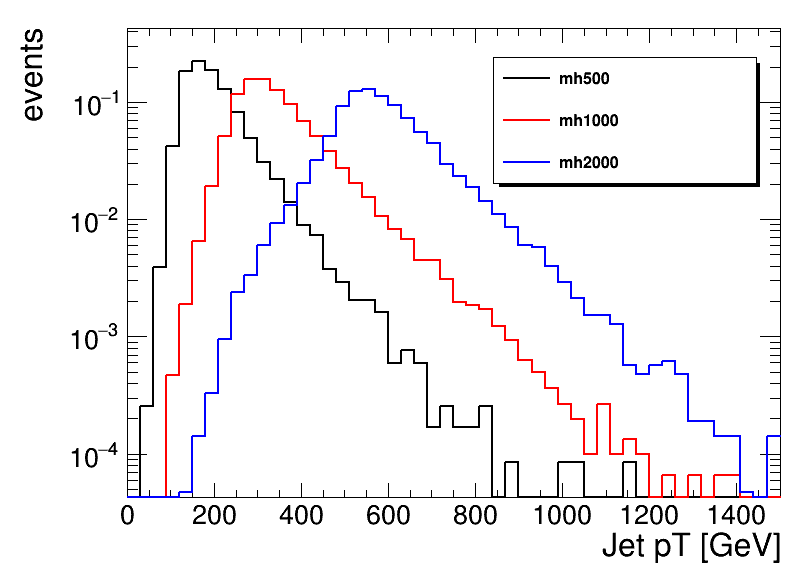

In [202]:
# plot leading jet pT
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

legend = {'mh125':'(m#phi,ms) = (125,50) GeV',
          'mh300':'(m#phi,ms) = (300,125) GeV',
         'mh500':'(m#phi,ms) = (500,225) GeV',
          'mh1000':'(m#phi,ms) = (1000,475) GeV',
          'mh2000':'(m#phi,ms) = (2000,975) GeV',
         }

for mass,u in jet_pt.items():
#     if mass == 'mh1000':
    for pl,v in u.items():   
        key = mass
        if pl == 'pl500':
            h[key] = create_TH1D( v, axis_title=['Jet pT [GeV]', 'events'], name=key, binning=[50,0,1500])
            h[key].SetLineColor(std_color_list[i])
            h[key].SetMarkerColor(std_color_list[i])

            leg.AddEntry(h[key],key)
        #     h[k].GetYaxis().SetRangeUser(0,300)
            if i == 0:
                h[key].DrawNormalized('')
            else:
                h[key].DrawNormalized('same')
            i += 1
leg.Draw()
c.SetLogy()
c.Draw()

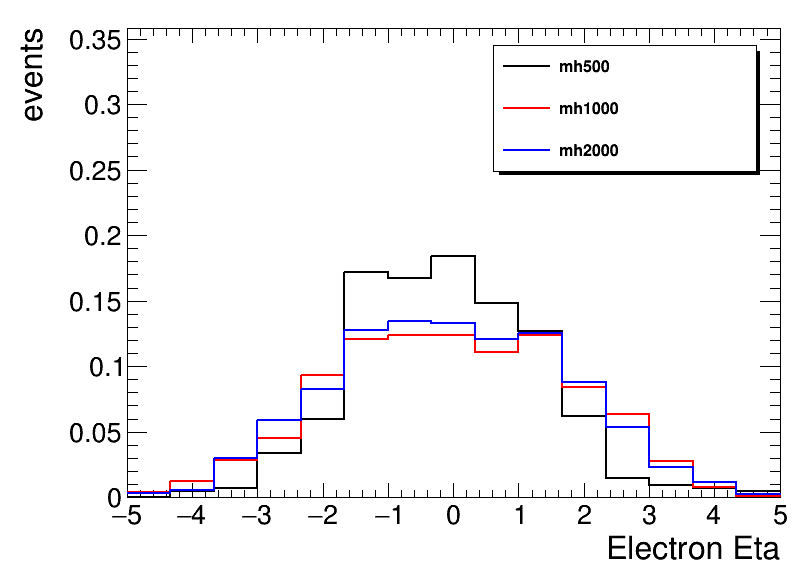

In [209]:
# plot leading jet pT
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.62,0.70,0.95,0.92);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

# legend = {'mh125':'(m#phi,ms) = (125,50) GeV',
#           'mh300':'(m#phi,ms) = (300,125) GeV',
#          'mh500':'(m#phi,ms) = (500,225) GeV',
#           'mh1000':'(m#phi,ms) = (1000,475) GeV',
#           'mh2000':'(m#phi,ms) = (2000,975) GeV',
#          }
for mass,u in ele_eta.items():
#     if mass == 'mh1000':
    for pl,v in u.items():  
            
        if pl == 'pl500':
            key = mass
            h[key] = create_TH1D( v, axis_title=['Electron Eta', 'events'], name=key, binning=[15,-5,5])
#             h[mass] = create_TH1D( v, axis_title=['Electron pT [GeV]', 'events'], name=mass, binning=[40,0,800])

            h[key].SetLineColor(std_color_list[i])
            h[key].SetMarkerColor(std_color_list[i])
            h[key].GetYaxis().SetRangeUser(0,150)
            leg.AddEntry(h[key],key)
        #     h[k].GetYaxis().SetRangeUser(0,300)
            if i == 0:
                h[key].DrawNormalized('')
            else:
                h[key].DrawNormalized('same')
            i += 1
leg.Draw()
# c.SetLogy()
c.Draw()